<a href="https://colab.research.google.com/github/ElGg01/Bresenham-Algorithm/blob/main/Line/%20Line%20Drawing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importaciones

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
import numpy as np

#Obteniendo los puntos

In [ ]:
puntoA = input("Introduce el valor del punto A separadas por comas: ").split(",")
puntoA = [int(cadena) for cadena in puntoA]
puntoB = input("Introduce el valor del punto B separadas por comas: ").split(",")
puntoB = [int(cadena) for cadena in puntoB]

Introduce el valor del punto A separadas por comas: 25, 25
Introduce el valor del punto B separadas por comas: 40, 5


#Definiendo el algoritmo

In [ ]:
def bresenham(puntoA, puntoB):
  #Se calcula dx e dy
  dx = abs(puntoB[0] - puntoA[0])
  dy = abs(puntoB[1] - puntoA[1])

  #Se obtiene la pendiente
  m = (puntoB[1] - puntoA[1])/(puntoB[0] - puntoA[0]) if puntoA[0] != puntoB[0] else "recta vertical"

  #Bandera que indicara si se deben sumar, restar o no hacer nada en el algoritmo
  bandera = False
  
  #Se invierten los valores si dx < dy
  if dx < dy:
    bandera = True
    temp = dy
    dy = dx
    dx = temp
  #Se establece un valor inicial para pk y para los valores de x e y
  pk = ["" if m == 0 or puntoB[0] == puntoA[0] else 2 * dy - dx]
  xy = [puntoA if puntoA[0] < puntoB[0] or puntoA[1] < puntoB[1] else puntoB]

  #Se calculan las constantes
  dosDY = 2 * dy
  dosDY_2DX = dosDY - (2 * dx)

  #Caso donde la pendiente es menor a 0
  if m == 0:
    print("Es una recta horizontal")
    print(xy)
    for i in range(dx):
      xy.append([xy[i][0] + 1, xy[i][1]])
      pk.append("")

  #Si la pendiente es infinita (recta vertical)
  elif puntoB[0] == puntoA[0]:
    print("Es una recta vertical")
    for i in range(dx):
      xy.append([xy[i][0], xy[i][1] + 1])
      pk.append("")

  #Si la pendiente es mayor a 0
  elif m > 0:
    print("Es una recta con pendiente mayor a 0")
    for i in range(dx):
      if (pk[i] < 0):
        xy.append([xy[i][0] + (0 if bandera else 1), xy[i][1] + (1 if bandera else 0)])
        pk.append(pk[i] + dosDY)
      else:
        xy.append([xy[i][0] + 1, xy[i][1] + 1])
        pk.append(pk[i] + dosDY_2DX)
    pk.insert(0, "")
    pk.pop()

  #Si la pendiente es menor a 0
  elif m < 0:
    print("Es una recta con pendiente menor a 0")
    for i in range(dx):
      if (pk[i] < 0):
        xy.append([xy[i][0] + (0 if bandera else 1), xy[i][1] - (1 if bandera else 0)])
        pk.append(pk[i] + dosDY)
      else:
        xy.append([xy[i][0] + 1, xy[i][1] - 1])
        pk.append(pk[i] + dosDY_2DX)

    pk.insert(0, "")
    pk.pop()
  return m, pk, xy

#Se obtienen los valores de la pendiente, pk y los valores de x e y al aplicar la funcion con los puntos dados
m, pk, xy = bresenham(puntoA, puntoB)

#Se crea una tabla con las coordenadas y los valores de pk
data = {"Pk": pk, "Coordenadas": xy}
tabla = pd.DataFrame(data)
print(tabla)

Es una recta con pendiente menor a 0
     Pk Coordenadas
0          [25, 25]
1    10    [26, 24]
2     0    [27, 23]
3   -10    [27, 22]
4    20    [28, 21]
5    10    [29, 20]
6     0    [30, 19]
7   -10    [30, 18]
8    20    [31, 17]
9    10    [32, 16]
10    0    [33, 15]
11  -10    [33, 14]
12   20    [34, 13]
13   10    [35, 12]
14    0    [36, 11]
15  -10    [36, 10]
16   20     [37, 9]
17   10     [38, 8]
18    0     [39, 7]
19  -10     [39, 6]
20   20     [40, 5]


#GRAFICA DE LAS COORDENADAS:

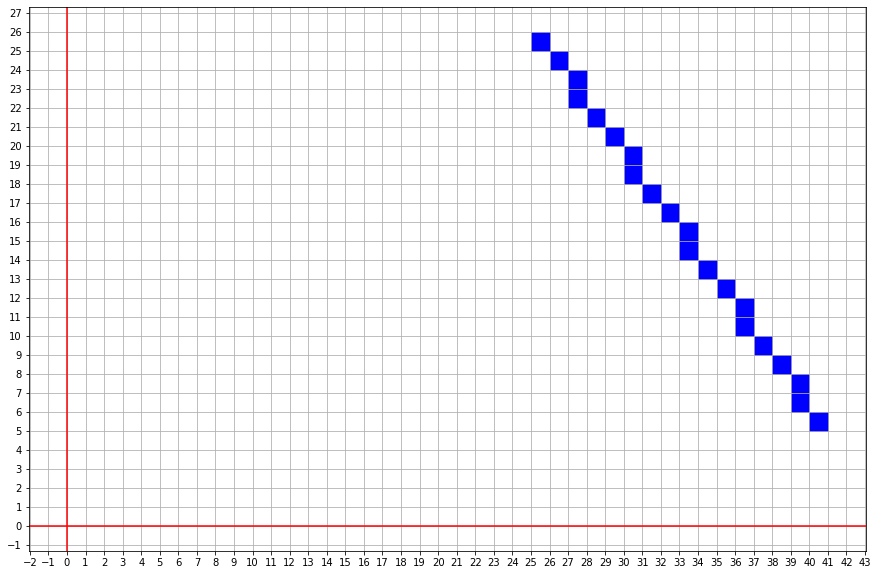

In [ ]:
# Crear una lista de coordenadas que son los valores basicamente de xy
coords = xy

#Encontramos los puntos minimos y puntos maximos para delimitar el rango de la grafica
menorX = puntoA[0] if puntoA[0] < puntoB[0] else puntoB[0]
mayorX = puntoA[0] if puntoA[0] > puntoB[0] else puntoB[0]
menorY = puntoA[1] if puntoA[1] < puntoB[1] else puntoB[1]
mayorY = puntoA[1] if puntoA[1] > puntoB[1] else puntoB[1]

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(15, 10))

# Configurar las marcas de graduación en los ejes x e y
plt.xticks(range(menorX - 50, mayorX + 50, 1))
plt.yticks(range(menorY - 50, mayorY + 50, 1))

#Lineas del plano cartesiano
plt.axvline(x=0, color="red")
plt.axhline(y=0, color="red")

#Muestra la cuadrícula
plt.grid(True)

# Pintar cada cuadro en la cuadrícula
for x, y in coords:
    rect = Rectangle((x-0, y-0), 1, 1, linewidth=1, edgecolor='blue', facecolor='blue')
    ax.add_patch(rect)

# Mostrar el gráfico
plt.autoscale()
plt.show()